# Question 1

**Model Measurement Analysis:**  Using any dataset and any classifier, calculate TP, TN, FP and FN from sklearn library functions. Also calculate different metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining our own functions. Compare your values with scikit-learn's library functions. Get the result of Confusion Matrix using sklearn. Using sklearn, plot the ROC & AUC Curves for your test data and random probabilities. Using sklearn, calculate the AUC of your test data and of random probabilities. Interpret the results. Write the inference/analysis of each output. Expectation is Supervised Learning Algorithms. Therefore, use any classifier. 

In [8]:
import pandas as pd

df= pd.read_csv('titanic.csv')
df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [9]:
df.drop(['Name','Sex','Siblings/Spouses Aboard','Parents/Children Aboard'],axis=1,inplace=True)
df.head(2)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def f1_scoresssss(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return 2 * (p * r) / (p + r)

def mcc(tp, tn, fp, fn):
    num = (tp * tn) - (fp * fn)
    denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return num / denom

def specificity(tn, fp):
    return tn / (tn + fp)

def npv(tn, fn):
    return tn / (tn + fn)

acc = accuracy(tp,tn,fp,fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f1 = f1_scoresssss(tp,fp,fn)
mcc = mcc(tp, tn, fp, fn)
spec = specificity(tn, fp)
npv = npv(tn, fn)

# Print evaluation metrics
print('==============Manually calculated===========')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Specificity: {spec:.4f}')
print(f'Negative Predictive Value: {npv:.4f}')

==============Manually calculated===========
Accuracy: 0.6798
Precision: 0.5926
Recall: 0.4776
F1-Score: 0.5289
MCC: 0.2945
Specificity: 0.8018
Negative Predictive Value: 0.7177


In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=================In-Built calculated==================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

=================In-Built calculated==================
Accuracy: 0.6797752808988764
Precision: 0.5925925925925926
Recall: 0.47761194029850745
F1-score: 0.5289256198347108


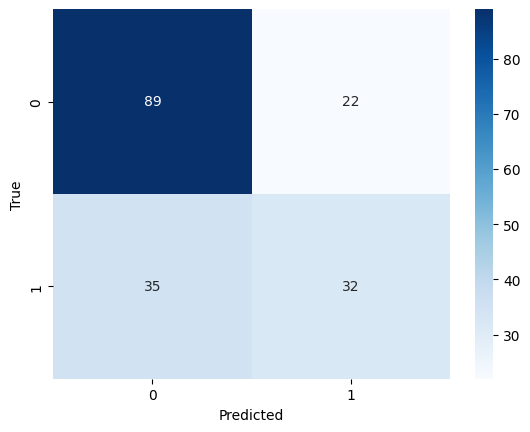

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume cm is the confusion matrix
# and target_names is a list of class names

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()